# Timing results for 2D Pressure Poisson Solver
These are the results for the different methods of solving this matrix on a 4 level mesh with the divide 3 option and strong scaling.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

# Full Matrix with Hypre (1)
This section is the timing results for solving the full matrix with a 4 level mesh using Hypre. This matrix has 2,129,920 degrees of freedom.

In [2]:
DOF = 8519680
Petsc_Hypre_Full_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Full_Iterations = np.array([27,25,26,26,25,25,25])
Petsc_Hypre_Full_Residual = np.array([5.9988067127624e-10,1.4273238491268e-10,1.7254957978808e-10,9.5011690618987e-11,
                                     4.1219666250785e-10,2.1063728799053e-10,4.8227291436170e-10])
Petsc_Hypre_Full_Error = np.array([2.3017137287093e-04,2.3017137246889e-04,2.3017137270920e-04,2.3017137270801e-04,
                                  2.3017137247438e-04,2.3017137244399e-04,2.3017137247297e-04])
Petsc_Hypre_Full_Domain = np.array([2.3153894807,1.2637218663,0.6478832577,0.3401489734,0.1812644858,0.0898693553,
                                   0.0617126075])
Petsc_Hypre_Full_Matrix = np.array([3.3369409704,2.0570431213,1.0631297091,0.5936307549,0.3467149461,0.161736464,
                                   0.0923267154])
Petsc_Hypre_Full_Petsc = np.array([10.3979734503,391.6720703532,186.4258577879,71.9993323065,21.9934946754,
                                  6.5406074993,2.8195007452])
Petsc_Hypre_Full_LSS = np.array([13.7349249107,393.7291275882,187.4890104319,72.5929859406,22.3402330636,6.7023960359,
                                2.9118931858])
Petsc_Hypre_Full_LinS = np.array([68.0680552959,40.4927748359,29.4081339507,24.11662926,17.5557686602,10.2702540602,
                                 8.4260292341])
Petsc_Hypre_Full_CS = np.array([68.0680601461,40.4927931763,29.408291536,24.1182497637,17.5584340833,10.2716404851,
                               8.4316525948])
Petsc_Hypre_Full_DegF = (DOF)/Petsc_Hypre_Full_CS/Petsc_Hypre_Full_Cores
Petsc_Hypre_Full_Eff = Petsc_Hypre_Full_CS[0]/(Petsc_Hypre_Full_CS*Petsc_Hypre_Full_Cores)

d = {"Cores": Petsc_Hypre_Full_Cores,"Iterations": Petsc_Hypre_Full_Iterations,"Residual": Petsc_Hypre_Full_Residual,
    "Error": Petsc_Hypre_Full_Error,"Domain Initialization": Petsc_Hypre_Full_Domain,"Matrix Formation": Petsc_Hypre_Full_Matrix,
    "Hypre Setup": Petsc_Hypre_Full_Petsc,"Linear System Setup": Petsc_Hypre_Full_LSS,"Linear Solve": Petsc_Hypre_Full_LinS,
    "Complete Solve": Petsc_Hypre_Full_CS,"Efficiency": Petsc_Hypre_Full_Eff,"Degrees of Freedom Per Time Per Core": Petsc_Hypre_Full_DegF}
df1 =  pd.DataFrame(data = d)
df1 = df1[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df1.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,27,6.00e-10,2.30e-04,2.31539,3.33694,10.398,13.7349,68.0681,68.0681,1,125164
1,2,25,1.43e-10,2.30e-04,1.26372,2.05704,391.672,393.729,40.4928,40.4928,0.840496,105200
2,4,26,1.73e-10,2.30e-04,0.647883,1.06313,186.426,187.489,29.4081,29.4083,0.578647,72425.8
3,8,26,9.50e-11,2.30e-04,0.340149,0.593631,71.9993,72.593,24.1166,24.1182,0.352783,44155.8
4,16,25,4.12e-10,2.30e-04,0.181264,0.346715,21.9935,22.3402,17.5558,17.5584,0.242291,30326.2
5,32,25,2.11e-10,2.30e-04,0.0898694,0.161736,6.54061,6.7024,10.2703,10.2716,0.207087,25919.9
6,64,25,4.82e-10,2.30e-04,0.0617126,0.0923267,2.8195,2.91189,8.42603,8.43165,0.126139,15788.1


<function matplotlib.pyplot.show>

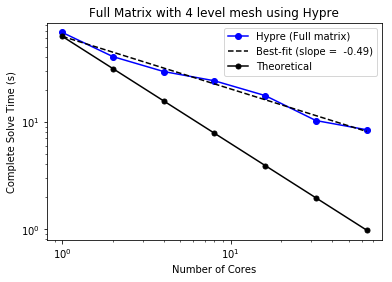

In [3]:
x = Petsc_Hypre_Full_Cores
y = Petsc_Hypre_Full_CS


plt.plot(x,y,"bo-",label="Hypre (Full matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using Hypre")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

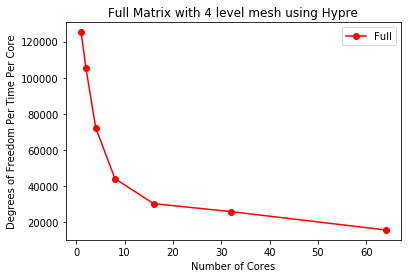

In [4]:
plt.plot(Petsc_Hypre_Full_Cores,Petsc_Hypre_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using Hypre")
plt.legend()

# Full Matrix with AMGX (2)
This section is the timing results for solving the full matrix using AMGX. This matrix has 8,519,680 degrees of freedom.

Was not able to get results on 1 or 2 cores. I got a memory error.

In [5]:
DOF = 8519680
Petsc_AMGX_Full_Cores = np.array([4,8,16])
Petsc_AMGX_Full_Iterations = np.array([53,54,100])
Petsc_AMGX_Full_Residual = np.array([2.6928778673549e-11,2.5390739248273e-11,4.4980646373830e+34])
Petsc_AMGX_Full_Error = np.array([2.3017137276764e-04,2.3017137259899e-04,2.5162658115142e+32])
Petsc_AMGX_Full_Domain = np.array([0.6384049258,0.3250950618,0.1596760514])
Petsc_AMGX_Full_Matrix = np.array([1.0501234819,0.5264085192,0.25415168])
Petsc_AMGX_Full_AMGX = np.array([5.8601402815,4.7022465706,3.3320006146])
Petsc_AMGX_Full_LSS = np.array([6.9102868591,5.2286880751,3.5861939082])
Petsc_AMGX_Full_LinS = np.array([3.168793774,2.4353946755,3.4660941007])
Petsc_AMGX_Full_CS = np.array([3.1688130379,2.4354128055,3.4661210478])
Petsc_AMGX_Full_DegF = (DOF)/Petsc_AMGX_Full_CS/Petsc_AMGX_Full_Cores
Petsc_AMGX_Full_Eff = Petsc_AMGX_Full_CS[0]/(Petsc_AMGX_Full_CS*Petsc_AMGX_Full_Cores)

d = {"Cores": Petsc_AMGX_Full_Cores,"Iterations": Petsc_AMGX_Full_Iterations,"Residual": Petsc_AMGX_Full_Residual,
    "Error": Petsc_AMGX_Full_Error,"Domain Initialization": Petsc_AMGX_Full_Domain,"Matrix Formation": Petsc_AMGX_Full_Matrix,
    "AMGX Setup": Petsc_AMGX_Full_AMGX,"Linear System Setup": Petsc_AMGX_Full_LSS,"Linear Solve": Petsc_AMGX_Full_LinS,
    "Complete Solve": Petsc_AMGX_Full_CS,"Efficiency": Petsc_AMGX_Full_Eff,"Degrees of Freedom Per Time Per Core": Petsc_AMGX_Full_DegF}
df2 =  pd.DataFrame(data = d)
df2 = df2[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df2.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,4,53,2.69e-11,2.30e-04,0.638405,1.05012,5.86014,6.91029,3.16879,3.16881,0.25,672151
1,8,54,2.54e-11,2.30e-04,0.325095,0.526409,4.70225,5.22869,2.43539,2.43541,0.162643,437281
2,16,100,4.50e+34,2.52e+32,0.159676,0.254152,3.332,3.58619,3.46609,3.46612,0.057139,153624


<function matplotlib.pyplot.show>

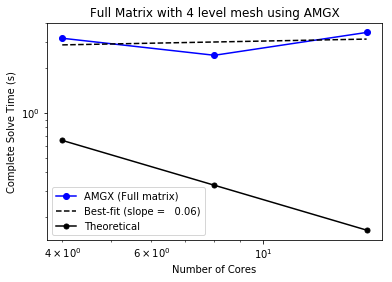

In [6]:
x = Petsc_AMGX_Full_Cores
y = Petsc_AMGX_Full_CS


plt.plot(x,y,"bo-",label="AMGX (Full matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using AMGX")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

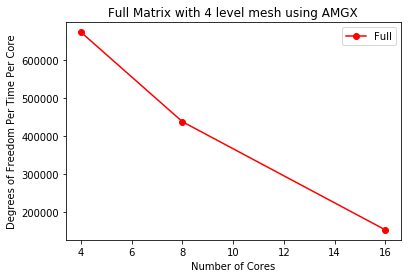

In [7]:
plt.plot(Petsc_AMGX_Full_Cores,Petsc_AMGX_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using AMGX")
plt.legend()

# Schur Matrix with Hypre (3)
This section is the timing results for solving the schur matrix using Hypre. This matrix has 8,519,680 degrees of freedom.

In [8]:
DOF = 8519680
Petsc_Hypre_Schur_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Schur_Iterations = np.array([17,17,16,16,16,16,16])
Petsc_Hypre_Schur_Residual = np.array([6.1286111926919e-11,6.2134639841536e-11,8.6109659566193e-11,7.5298885813740e-11,
                                      5.3103746292143e-11,6.6940599763223e-11,8.3366098373893e-11])
Petsc_Hypre_Schur_Error = np.array([2.3017137184157e-04,2.3017137158352e-04,2.3017137048573e-04,2.3017137047431e-04,
                                   2.3017137130284e-04,2.3017137168851e-04,2.3017137239884e-04])
Petsc_Hypre_Schur_Domain = np.array([2.3197806585,1.2814900692,0.6509059762,0.3381413722,0.1805943389,0.0881982429,
                                    0.0443178398])
Petsc_Hypre_Schur_Matrix = np.array([4.7018186739,2.4026621332,1.3947369839,0.8362200437,0.5057102746,0.2605099553,
                                    0.1436562632])
Petsc_Hypre_Schur_Petsc = np.array([4.6436607393,2.7133943007,1.5416259761,0.931570187,0.6209502718,0.3556885271,
                                   0.2475464451])
Petsc_Hypre_Schur_LSS = np.array([9.3454893739,5.116069321,2.9363804747,1.767811494,1.1267286854,0.6162593805,
                                 0.391279977])
Petsc_Hypre_Schur_LinS = np.array([26.6610254107,14.2418270011,8.8950367894,7.5887215761,7.1686851578,5.1473824642,
                                  1.0967835393])
Petsc_Hypre_Schur_PatS = np.array([0.2467111158,0.1406464368,0.0988530172,0.0821939839,0.0843995927,0.0470875859,
                                  0.0091415173])
Petsc_Hypre_Schur_CS = np.array([26.9077451058,14.3824872351,8.9939953395,7.6712551782,7.2538566353,5.2004614297,
                                1.1060020951])
Petsc_Hypre_Schur_DegF = (DOF)/Petsc_Hypre_Schur_CS/Petsc_Hypre_Schur_Cores
Petsc_Hypre_Schur_Eff = Petsc_Hypre_Schur_CS[0]/(Petsc_Hypre_Schur_CS*Petsc_Hypre_Schur_Cores)

d = {"Cores": Petsc_Hypre_Schur_Cores,"Iterations": Petsc_Hypre_Schur_Iterations,"Residual": Petsc_Hypre_Schur_Residual,
    "Error": Petsc_Hypre_Schur_Error,"Domain Initialization": Petsc_Hypre_Schur_Domain,"Matrix Formation": Petsc_Hypre_Schur_Matrix,
    "Hypre Setup": Petsc_Hypre_Schur_Petsc,"Linear System Setup": Petsc_Hypre_Schur_LSS,"Linear Solve": Petsc_Hypre_Schur_LinS,
    "Patch Solve": Petsc_Hypre_Schur_PatS,"Complete Solve": Petsc_Hypre_Schur_CS,"Efficiency": Petsc_Hypre_Schur_Eff,
     "Degrees of Freedom Per Time Per Core": Petsc_Hypre_Schur_DegF}
df3 =  pd.DataFrame(data = d)
df3 = df3[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df3.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,17,6.13e-11,2.30e-04,2.31978,4.70182,4.64366,9.34549,26.661,0.246711,26.9077,1,316626
1,2,17,6.21e-11,2.30e-04,1.28149,2.40266,2.71339,5.11607,14.2418,0.140646,14.3825,0.935434,296182
2,4,16,8.61e-11,2.30e-04,0.650906,1.39474,1.54163,2.93638,8.89504,0.098853,8.994,0.747936,236816
3,8,16,7.53e-11,2.30e-04,0.338141,0.83622,0.93157,1.76781,7.58872,0.082194,7.67126,0.438451,138825
4,16,16,5.31e-11,2.30e-04,0.180594,0.50571,0.62095,1.12673,7.16869,0.0843996,7.25386,0.23184,73406.5
5,32,16,6.69e-11,2.30e-04,0.0881982,0.26051,0.355689,0.616259,5.14738,0.0470876,5.20046,0.161691,51195.5
6,64,16,8.34e-11,2.30e-04,0.0443178,0.143656,0.247546,0.39128,1.09678,0.00914152,1.106,0.380138,120361


<function matplotlib.pyplot.show>

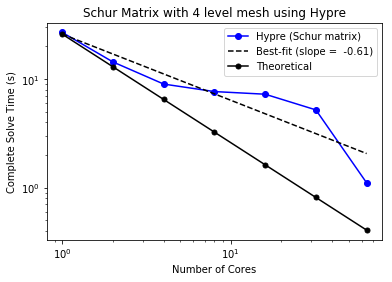

In [9]:
x = Petsc_Hypre_Schur_Cores
y = Petsc_Hypre_Schur_CS


plt.plot(x,y,"bo-",label="Hypre (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using Hypre")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

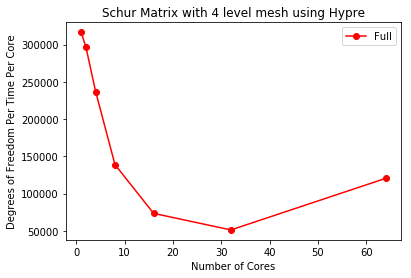

In [10]:
plt.plot(Petsc_Hypre_Schur_Cores,Petsc_Hypre_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using Hypre")
plt.legend()

# Schur Matrix with AMGX (4)

This section is the timing results for solving the schur matrix using AMGX. This matrix has 8,519,680 degrees of freedom.

In [11]:
DOF = 8519680
Petsc_AMGX_Schur_Cores = np.array([1,2,4,8,16])
Petsc_AMGX_Schur_Iterations = np.array([19,20,20,41,43])
Petsc_AMGX_Schur_Residual = np.array([5.2936983910698e-11,7.5600542815270e-11,7.4026913091532e-11,7.6694115873228e-11,
                                     7.7819407916075e-11])
Petsc_AMGX_Schur_Error = np.array([2.3017137248232e-04,2.3017137207938e-04,2.3017137136600e-04,2.3017140291427e-04,
                                  2.3017137841256e-04])
Petsc_AMGX_Schur_Domain = np.array([2.3337616937,1.2930742003,0.6458368543,0.320829864,0.1596537432])
Petsc_AMGX_Schur_Matrix = np.array([4.7120087786,2.4247896112,1.3989577046,0.7023233447,0.3609061177])
Petsc_AMGX_Schur_AMGX = np.array([3.3300434468,2.3564731745,3.2339107711,1.1047223745,0.8511620792])
Petsc_AMGX_Schur_LSS = np.array([8.0420624677,4.7812800098,4.6328985485,1.807076874,1.2121099722])
Petsc_AMGX_Schur_LinS = np.array([1.4526519399,0.8794994916,0.5656855198,0.791941556,0.6672197783])
Petsc_AMGX_Schur_PS = np.array([0.2378894442,0.1342686384,0.0674168489,0.0339031809,0.0184403416])
Petsc_AMGX_Schur_CS = np.array([1.6905478806,1.013778522,0.6331196053,0.8258673021,0.6856942482])
Petsc_AMGX_Schur_DegF = (DOF)/Petsc_AMGX_Schur_CS/Petsc_AMGX_Schur_Cores
Petsc_AMGX_Schur_Eff = np.array(np.ones(len(Petsc_AMGX_Schur_Cores))*Petsc_AMGX_Schur_CS[0]/(Petsc_AMGX_Schur_CS*Petsc_AMGX_Schur_Cores))

d = {"Cores": Petsc_AMGX_Schur_Cores,"Iterations": Petsc_AMGX_Schur_Iterations,"Residual": Petsc_AMGX_Schur_Residual,
    "Error": Petsc_AMGX_Schur_Error,"Domain Initialization": Petsc_AMGX_Schur_Domain,"Matrix Formation": Petsc_AMGX_Schur_Matrix,
    "AMGX Setup": Petsc_AMGX_Schur_AMGX,"Linear System Setup": Petsc_AMGX_Schur_LSS,"Linear Solve": Petsc_AMGX_Schur_LinS,
    "Patch Solve": Petsc_AMGX_Schur_PS,"Complete Solve": Petsc_AMGX_Schur_CS,"Efficiency": Petsc_AMGX_Schur_Eff,
    "Degrees of Freedom Per Time Per Core": Petsc_AMGX_Schur_DegF}
df4 =  pd.DataFrame(data = d)
df4 = df4[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df4.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,19,5.29e-11,2.30e-04,2.33376,4.71201,3.33004,8.04206,1.45265,0.237889,1.69055,1,5.0396e+06
1,2,20,7.56e-11,2.30e-04,1.29307,2.42479,2.35647,4.78128,0.879499,0.134269,1.01378,0.833786,4.20194e+06
2,4,20,7.40e-11,2.30e-04,0.645837,1.39896,3.23391,4.6329,0.565686,0.0674168,0.63312,0.667547,3.36417e+06
3,8,41,7.67e-11,2.30e-04,0.32083,0.702323,1.10472,1.80708,0.791942,0.0339032,0.825867,0.255875,1.2895e+06
4,16,43,7.78e-11,2.30e-04,0.159654,0.360906,0.851162,1.21211,0.66722,0.0184403,0.685694,0.154091,776556


<function matplotlib.pyplot.show>

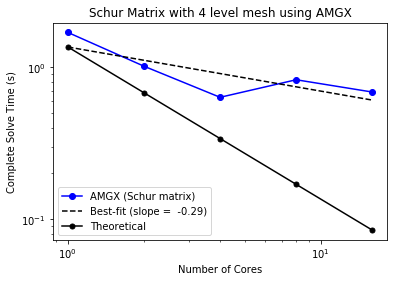

In [12]:
x = Petsc_AMGX_Schur_Cores
y = Petsc_AMGX_Schur_CS


plt.plot(x,y,"bo-",label="AMGX (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using AMGX")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

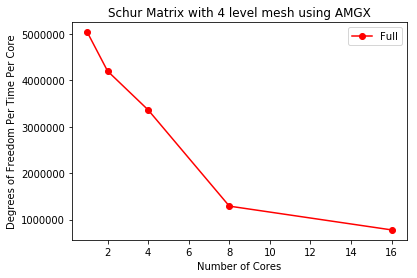

In [13]:
plt.plot(Petsc_AMGX_Schur_Cores,Petsc_AMGX_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using AMGX")
plt.legend()

# Comparison of Full vs Schur solve

First comparison is for Hypre, second for AMGX.

<function matplotlib.pyplot.show>

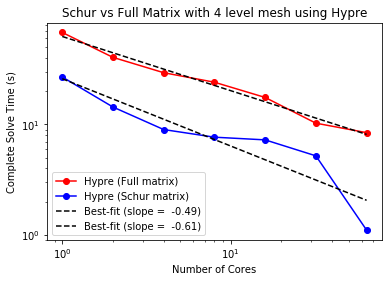

In [14]:
xf = Petsc_Hypre_Full_Cores
yf = Petsc_Hypre_Full_CS
xs = Petsc_Hypre_Schur_Cores
ys = Petsc_Hypre_Schur_CS


plt.plot(xf,yf,"ro-",label="Hypre (Full matrix)")
plt.plot(xs,ys,"bo-",label="Hypre (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur vs Full Matrix with 4 level mesh using Hypre")

cf = np.polyfit(np.log(xf),np.log(yf),1)
cs = np.polyfit(np.log(xs),np.log(ys),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

sf = "Best-fit (slope = {:6.2f})".format(cf[0])
ss = "Best-fit (slope = {:6.2f})".format(cs[0])
plt.loglog(xf,np.exp(np.polyval(cf,np.log(xf))),'k--',label=sf)
plt.loglog(xs,np.exp(np.polyval(cs,np.log(xs))),'k--',label=ss)


plt.legend()
plt.show

<function matplotlib.pyplot.show>

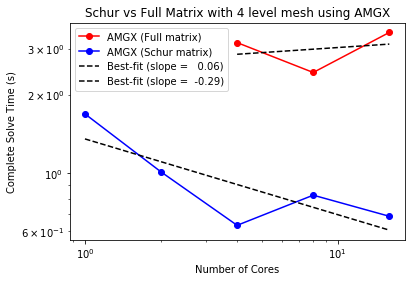

In [15]:
xf = Petsc_AMGX_Full_Cores
yf = Petsc_AMGX_Full_CS
xs = Petsc_AMGX_Schur_Cores
ys = Petsc_AMGX_Schur_CS


plt.plot(xf,yf,"ro-",label="AMGX (Full matrix)")
plt.plot(xs,ys,"bo-",label="AMGX (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur vs Full Matrix with 4 level mesh using AMGX")

cf = np.polyfit(np.log(xf),np.log(yf),1)
cs = np.polyfit(np.log(xs),np.log(ys),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

sf = "Best-fit (slope = {:6.2f})".format(cf[0])
ss = "Best-fit (slope = {:6.2f})".format(cs[0])
plt.loglog(xf,np.exp(np.polyval(cf,np.log(xf))),'k--',label=sf)
plt.loglog(xs,np.exp(np.polyval(cs,np.log(xs))),'k--',label=ss)


plt.legend()
plt.show